<a href="https://colab.research.google.com/github/alvarogg777/colabCompression/blob/master/Compress_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np


In [0]:
!rm *.py
!git clone https://github.com/alvarogg777/colabCompression.git
!mv colabCompression/*.ipynb . && rm -r colabCompression && jupyter nbconvert --to script *.ipynb && mv Compress_Lab1.txt lab1.py && mv Compress_Lab2.txt lab2.py && mv Compress_Lab3.txt lab3.py && rm *.ipynb && ls

Cloning into 'colabCompression'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 127 (delta 77), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (127/127), 4.50 MiB | 7.95 MiB/s, done.
Resolving deltas: 100% (77/77), done.
[NbConvertApp] Converting notebook Compress_Lab1.ipynb to script
[NbConvertApp] Writing 3980 bytes to Compress_Lab1.txt
[NbConvertApp] Converting notebook Compress_Lab2.ipynb to script
[NbConvertApp] Writing 4871 bytes to Compress_Lab2.txt
[NbConvertApp] Converting notebook Compress_Lab3.ipynb to script
[NbConvertApp] Writing 6280 bytes to Compress_Lab3.txt
[NbConvertApp] Converting notebook Compress_Lab4.ipynb to script
[NbConvertApp] Writing 13317 bytes to Compress_Lab4.txt
Compress_Lab4.txt  lab1.py  lab3.py	 sample_data
frames		   lab2.py  __pycache__  xylophone.mp4


In [0]:
from matplotlib import pyplot as plt
import numpy as np
import os
def removeExclamationsAndDownloads():
  for file in os.listdir():
    if(file.endswith('.py')):
      lines=[]
      with open(file) as f:
        for line in f.readlines():
          if(line[0]!='!' and not line.startswith('files.download')):
            lines.append(line)
      os.remove(file)
      with open(file,'w') as f:
        for line in lines:
          f.write(line)
removeExclamationsAndDownloads()

(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)
haar entropies: [11.24921645  8.13887495  7.44151933  6.87620368  5.86869705  5.39444857
  4.807082  ]
haar quantized: [11.24921645  4.19588299  3.84070036  3.023436    2.12801774  2.15582308
  2.15582308]
14
total haar entropy: 6.124170304944394 
total haar quantized entropy: 5.411884141520513
[0.71116064 0.98293684 1.07504928 1.16343267 1.36316459 1.48300608
 1.66421126]
[0.71116064 1.90663086 2.08295344 2.64599615 3.75936715 3.71087965
 3.71087965]
compress total haar ratio: 1.3062994008414726 
compress total haar quantized ratio: 1.478228245616569
130.9884356893599
PSNR on quantized haar reverted 2.8588756550470262
0.0
PSNR on haar reverted 100


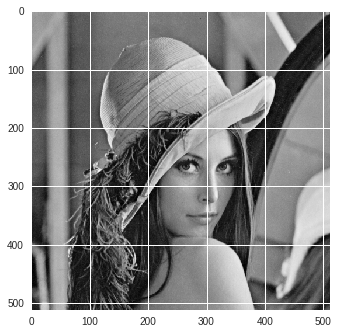

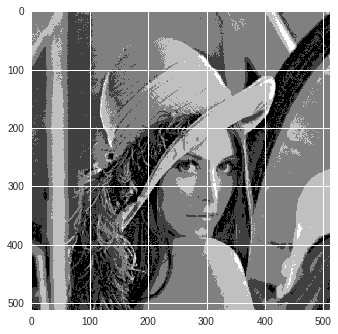

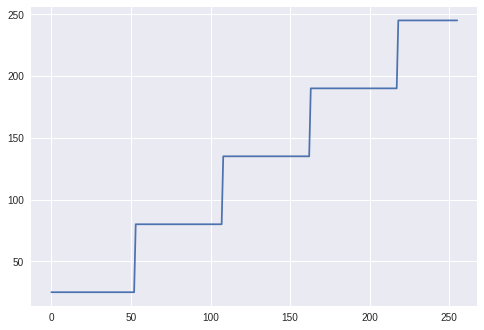

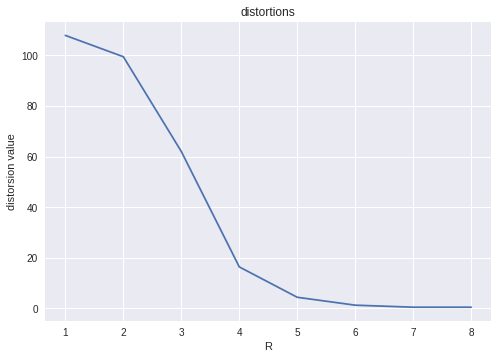

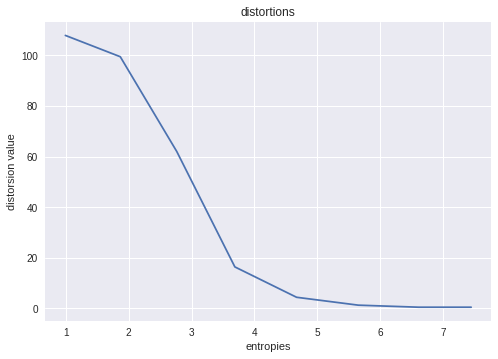

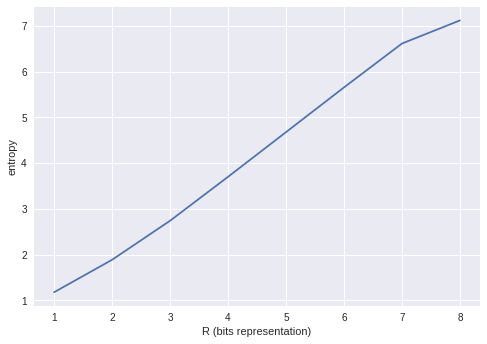

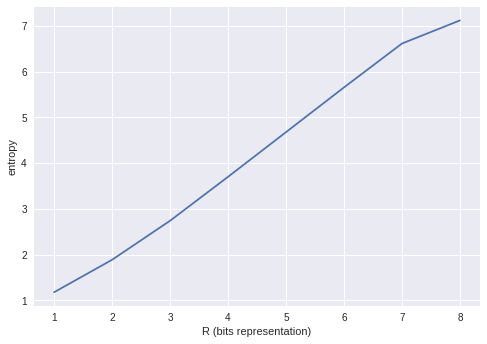

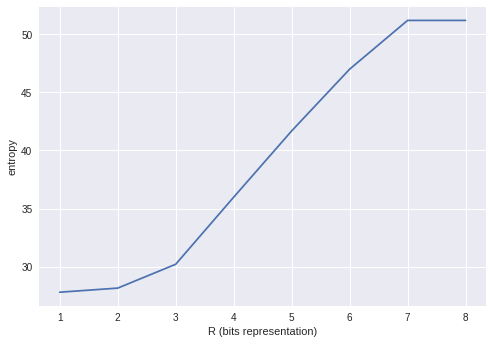

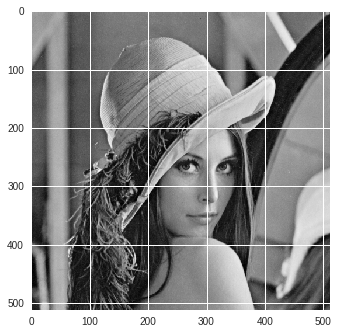

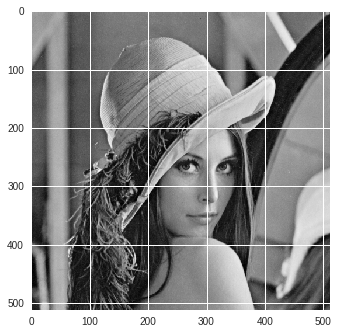

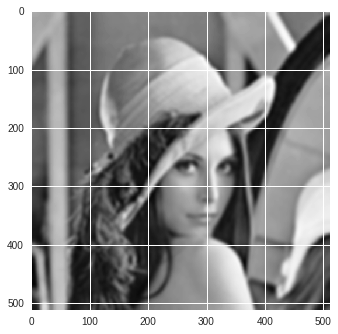

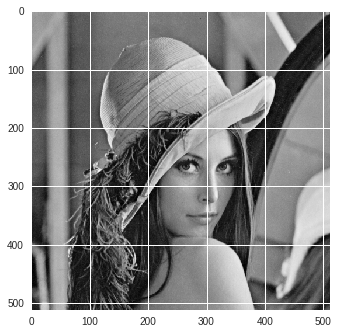

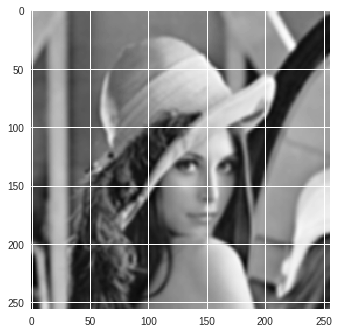

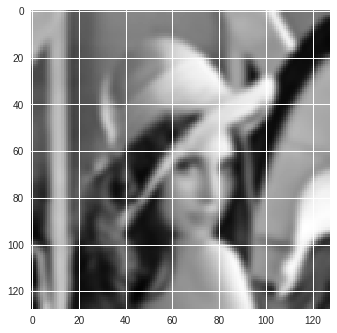

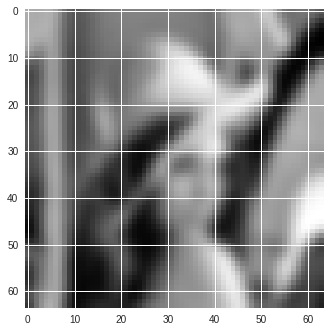

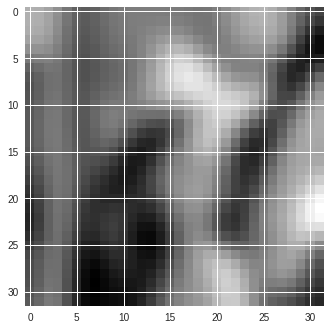

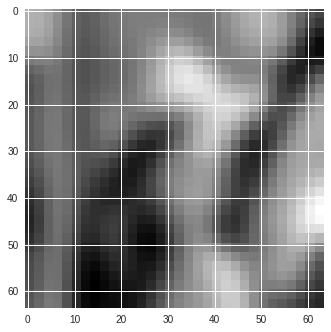

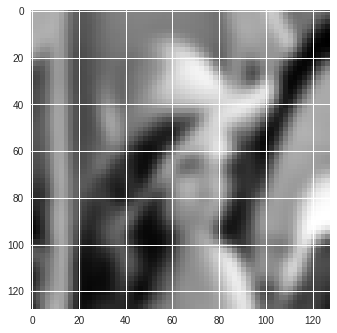

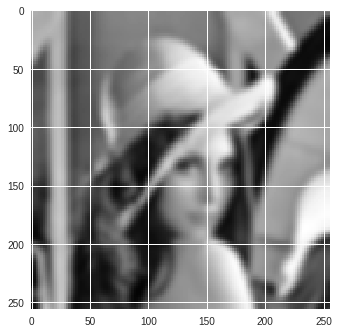

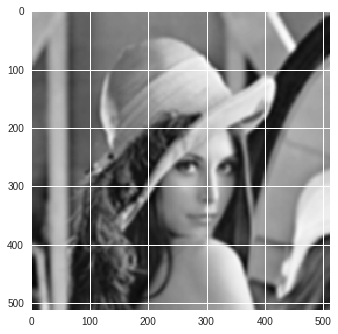

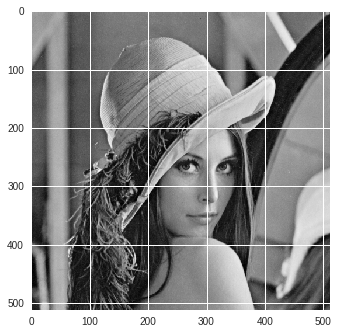

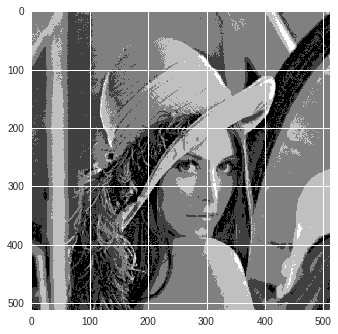

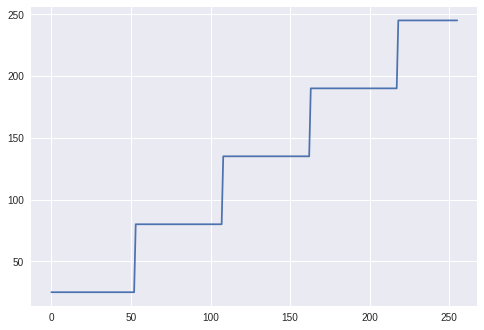

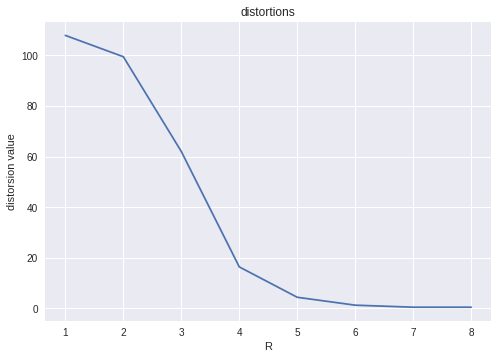

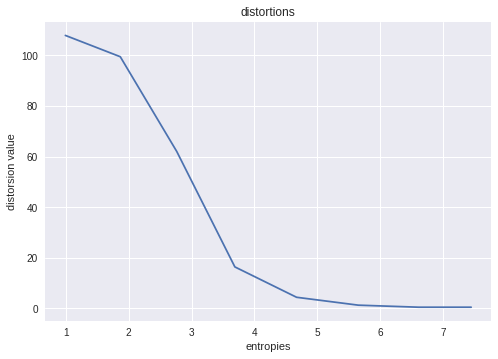

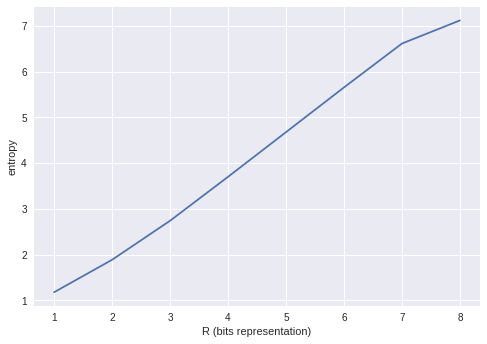

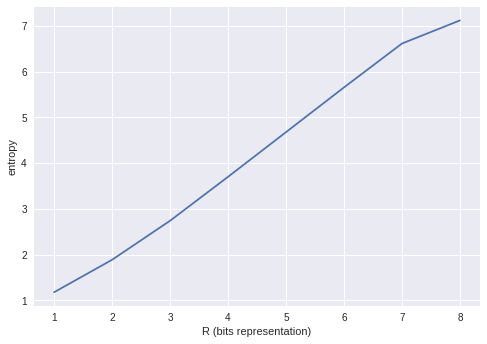

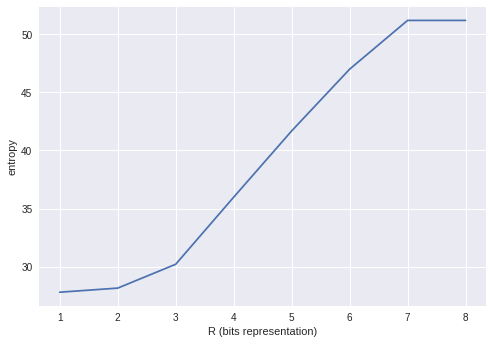

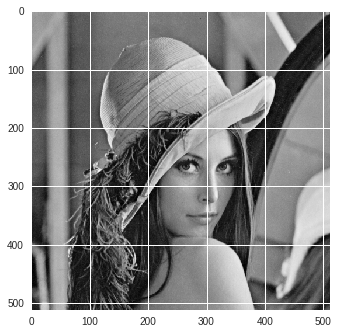

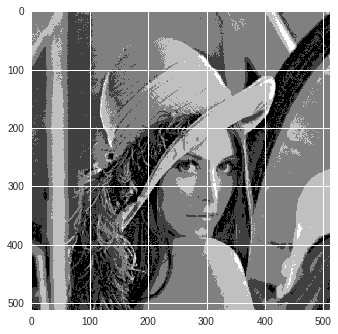

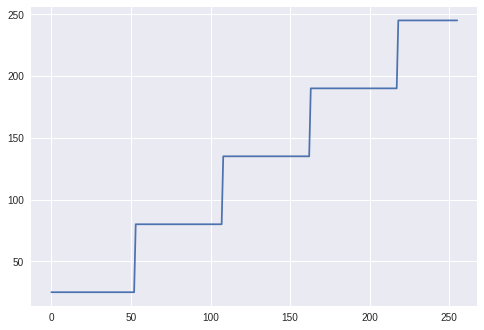

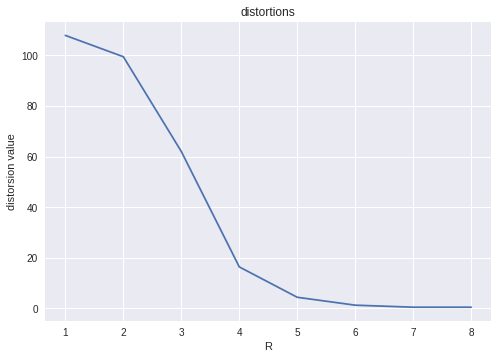

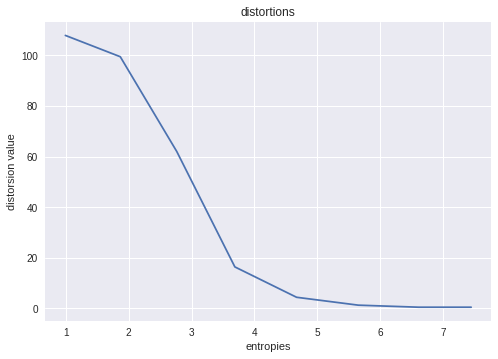

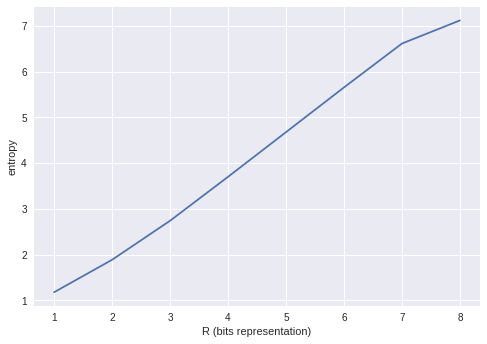

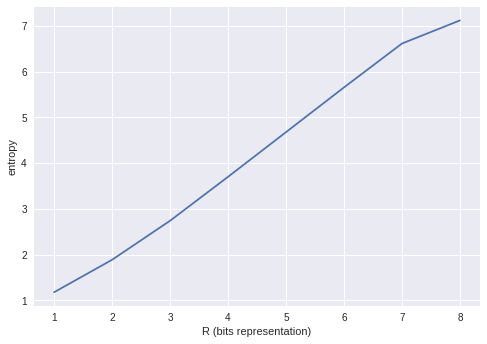

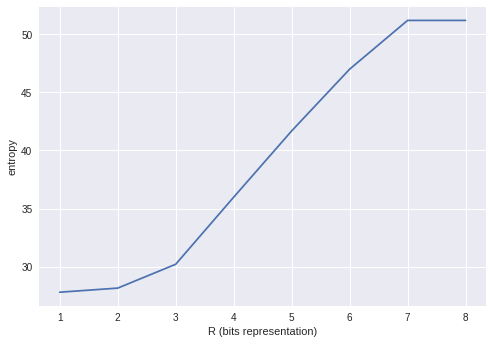

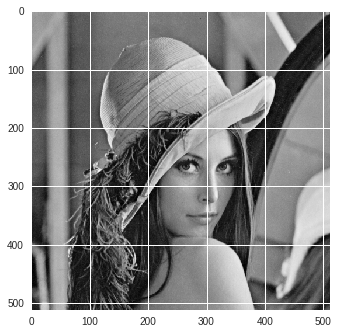

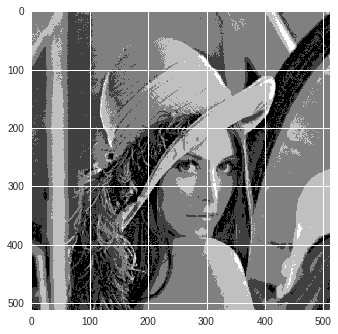

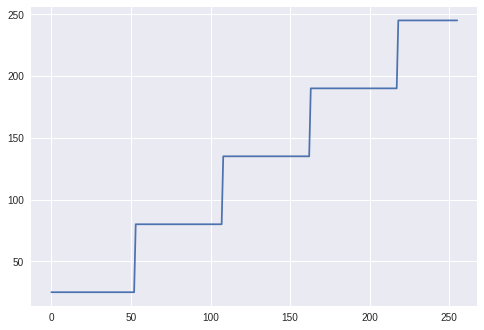

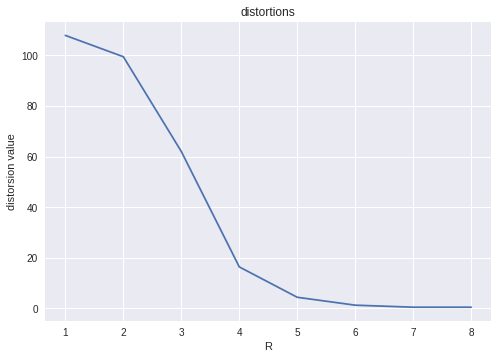

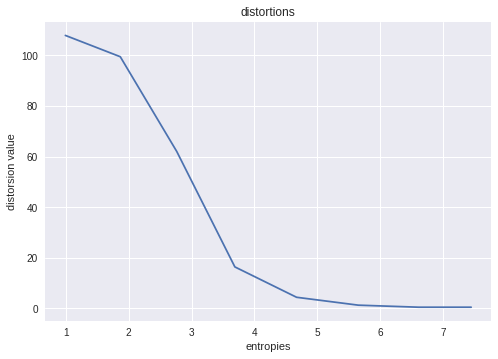

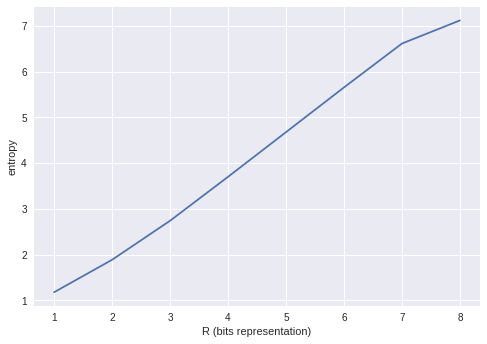

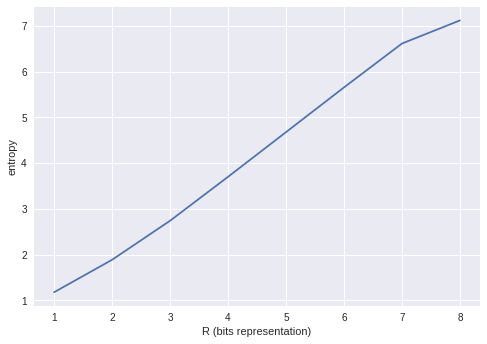

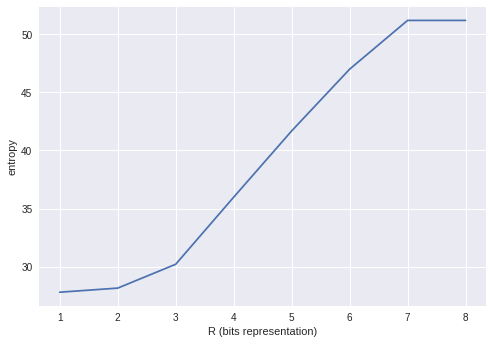

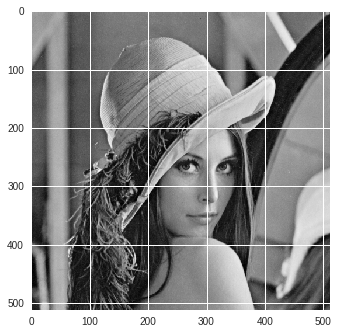

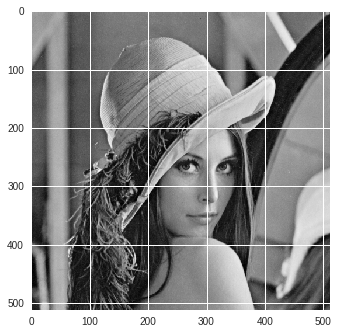

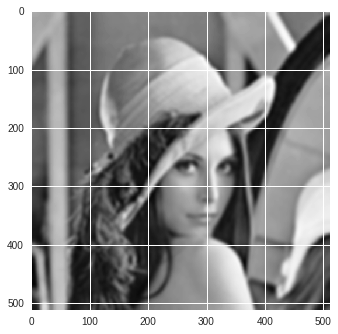

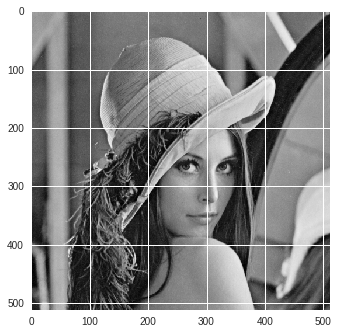

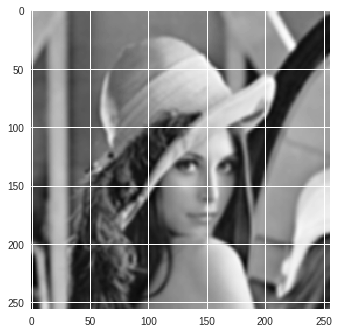

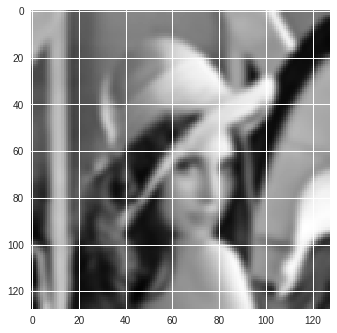

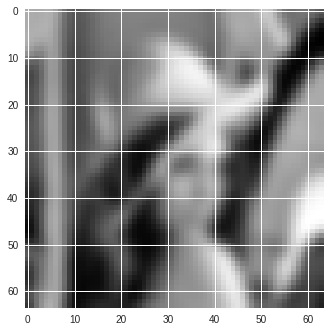

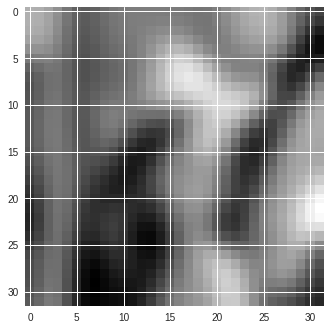

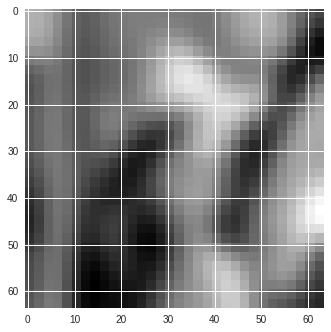

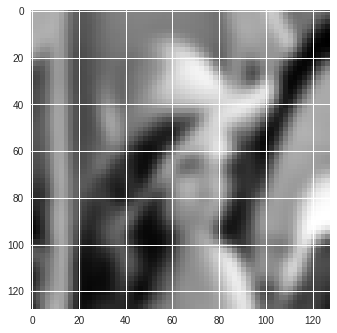

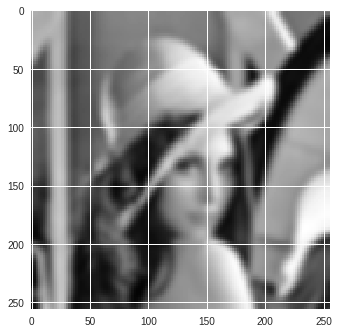

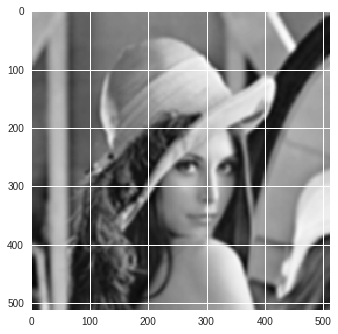

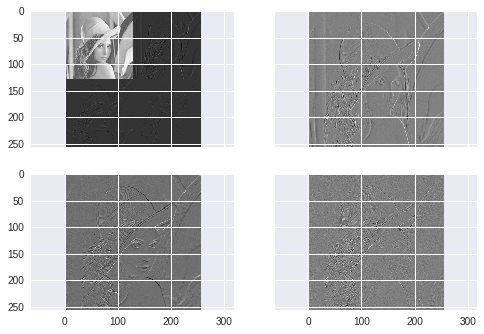

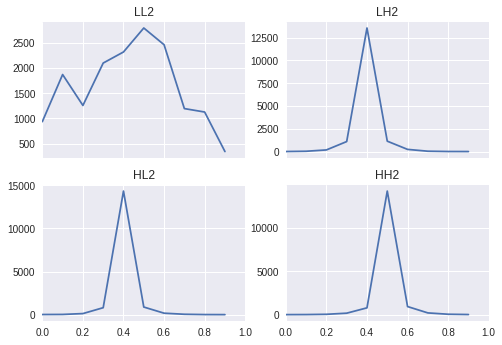

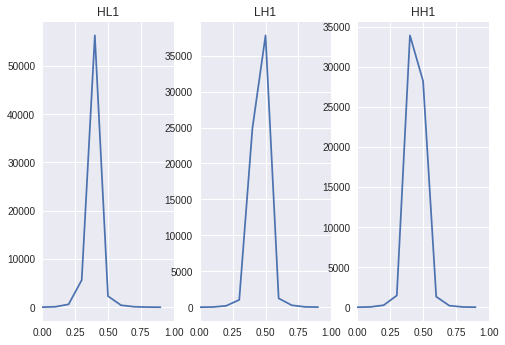

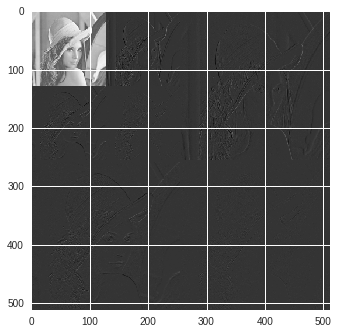

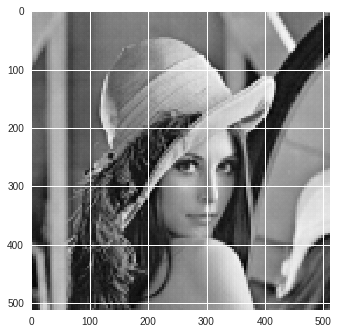

In [0]:
from lab3 import lena, ll2_norm,lh2_norm,hl2_norm,hh2_norm,lh1_norm,hl1_norm,hh1_norm,lh2_q,hl2_q,hh2_q,lh1_q,hl1_q,hh1_q,lena_q,totalE_lena,totalE_lena_q
from lab3 import normalize 
from lab3 import entropies as haar_entropies
from lab3 import compressRates as haar_compressRates
from lab1 import psnr_entropy,getDistortion,shannonEntropy

In [0]:
def find5maxmin(input_matrix):
  freqDict={}
  uniques=np.unique(input_matrix)
  for value in uniques:
    freqDict[value]=(input_matrix==value).sum() / np.size(input_matrix)

  min5=sorted(freqDict.items(),key=lambda item: item[1])[0:5]
  max5=sorted(freqDict.items(),key=lambda item: item[1])[::-1][0:5]
  return max5,min5
max5=dict(find5maxmin(lena)[0])
min5=dict(find5maxmin(lena)[1])

In [0]:
from heapq import heappush, heappop, heapify
import pandas as pd
class huffmanCode():
  def __init__(self,input_matrix):
    self.huffmanDict={}
    self.codes=pd.DataFrame({'symbol':[],'weights':[],'huffmanCode':[]})
    self.setHuffmanDict(input_matrix)
    self.setCodes()
  def setHuffmanDict(self,input_matrix):
    freqDict={}
    uniques=np.unique(input_matrix)
    for value in uniques:
      self.huffmanDict[value]=(input_matrix==value).sum() / np.size(input_matrix)
  def setCodes(self):
    """Huffman encode the given dict mapping symbols to weights"""
    heapQueue = [[wt, [sym, ""]] for sym, wt in self.huffmanDict.items()]#heap contains all the symbols (Nfreq, N elements in our queue)
    heapify(heapQueue)
    oldLen=len(heapQueue)
    first=heapQueue[0]
    last=heapQueue[1]
    while len(heapQueue) > 1:#we keep dequeing until len==1, having one element with [freq 1 and all the [symbol,code]]
        lo = heappop(heapQueue)#take first lowest frequency from the heap
        hi = heappop(heapQueue)#take second
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]#starts putting 0 as huffcode to first symbol
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heapQueue, [lo[0] + hi[0]] + lo[1:] + hi[1:])#here pushes to the heap sortly by weight: (sum of their weights),[symbol1,code1],[symbol2,code2]
#         if(len(heapQueue)==2): #print this condition if you want to have an idea on how it gets reduced
#           print(heapQueue[0])
#           print(heapQueue[1])
        #first iteration pushes: [[7.62939453125e-06, [25, '0'], [245, '1']]]
    sortCodes=sorted(heappop(heapQueue)[1:], key=lambda p: (len(p[1]),p))
    for index,p in enumerate(sortCodes):
      self.codes.loc[index]=[p[1], p[0],self.huffmanDict[p[0]]]
huffman=huffmanCode(lena)#lets run it on lena

In [0]:
print(len(huffman.codes))
huffman.codes.tail()
huffman.codes.head()

215


,huffmanCode,symbol,weights
0,0010100,43.0,0.006264
1,0011101,44.0,0.006699
2,0101011,45.0,0.007042
3,1000010,46.0,0.007774
4,1001001,47.0,0.007881


https://scicomp.stackexchange.com/questions/10757/implement-the-huffman-code-in-python-or-numpy

Let's prove that priority queue algorithm works fine by taking a look at the weights

In [0]:
print(max5,min5)

{154: 0.010387420654296875, 155: 0.01026153564453125, 156: 0.010196685791015625, 153: 0.009960174560546875, 157: 0.009510040283203125} {25: 3.814697265625e-06, 235: 3.814697265625e-06, 238: 3.814697265625e-06, 244: 3.814697265625e-06, 245: 3.814697265625e-06}


In [0]:
for i in max5:
  print(i)
  found=huffman.codes[huffman.codes.symbol==i]
  print(found)
  print('len code:',len(found.huffmanCode.iloc[0]))
  
for i in min5:
  print(i)
  found=huffman.codes[huffman.codes.symbol==i]
  print(found)
  print('len code:',len(found.huffmanCode.iloc[0]))  

154
   huffmanCode  symbol   weights
66     1111010   154.0  0.010387
len code: 7
155
   huffmanCode  symbol   weights
67     1110111   155.0  0.010262
len code: 7
156
   huffmanCode  symbol   weights
68     1110110   156.0  0.010197
len code: 7
153
   huffmanCode  symbol  weights
65     1110100   153.0  0.00996
len code: 7
157
   huffmanCode  symbol  weights
69     1110000   157.0  0.00951
len code: 7
25
            huffmanCode  symbol   weights
211  011010100110011010    25.0  0.000004
len code: 18
235
            huffmanCode  symbol   weights
212  011010100110011011   235.0  0.000004
len code: 18
238
            huffmanCode  symbol   weights
213  011010100110011100   238.0  0.000004
len code: 18
244
            huffmanCode  symbol   weights
214  011010100110011101   244.0  0.000004
len code: 18
245
           huffmanCode  symbol   weights
210  01101010011001100   245.0  0.000004
len code: 17


build a Huffman code tree and, therefore, associate codewords to Haar
wavelet coefficients in your **decomposition, depending on the probabilities
of occurrence (or histogram of coefficients) (thus on the quantized haar)**

In [0]:
ll2_h=huffmanCode(ll2_norm).codes
lh2_qh=huffmanCode(lh2_q).codes#lh2_q 7 quantization on lh2
hl2_qh=huffmanCode(hl2_q).codes
hh2_qh=huffmanCode(hh2_q).codes
lh1_qh=huffmanCode(lh1_q).codes
hl1_qh=huffmanCode(hl1_q).codes
hh1_qh=huffmanCode(hh1_q).codes
lena_qh=huffmanCode(lena_q).codes

In [0]:
def avgLength(df_codes):
  codes=df_codes['huffmanCode']
  codes=codes.apply(lambda x: len(x))#length codes
  codes=codes*df_codes['weights']
  return codes.sum()
sh_ll2_qh=avgLength(ll2_h)
sh_lh2_qh=avgLength(lh2_qh)
sh_hl2_qh=avgLength(hl2_qh)
sh_hh2_qh=avgLength(hh2_qh)
sh_lh1_qh=avgLength(lh1_qh)
sh_hl1_qh=avgLength(hl1_qh)
sh_hh1_qh=avgLength(hh1_qh)
# sh_lena_qh=avgLength(lena_qh)
# lengths=[sh_ll2_qh,sh_lh2_qh,sh_hl2_qh,sh_hh2_qh,sh_lh1_qh,sh_hl1_qh,sh_hh1_qh]

    
totalE_lena_qh=(sh_ll2_qh)*np.size(ll2_h)/np.size(lena)
print('avg length codework (bits/symbol) huffman ll2:',sh_ll2_qh)
print('avg length codework (bits/symbol) huffman lh2 quantized:',sh_lh2_qh)
print('avg length codework (bits/symbol) huffman hl2 quantized:',sh_hl2_qh)
print('avg length codework (bits/symbol) huffman hh2 quantized:',sh_hh2_qh)
print('avg length codework (bits/symbol) huffman lh1 quantized:',sh_lh1_qh)
print('avg length codework (bits/symbol) huffman hl1 quantized:',sh_hl1_qh)
print('avg length codework (bits/symbol) huffman hh1 quantized:',sh_hh1_qh)
print('avg length codework (bits/symbol) huffman lena quantized:',totalE_lena_qh)
entropies_hq=np.array([sh_ll2_qh,sh_lh2_qh,sh_hl2_qh,sh_hh2_qh,sh_lh1_qh,sh_hl1_qh,sh_hh1_qh])#,sh_lena_qh])

avg length codework (bits/symbol) huffman ll2: 11.27996826171875
avg length codework (bits/symbol) huffman lh2 quantized: 4.2303466796875
avg length codework (bits/symbol) huffman hl2 quantized: 3.87640380859375
avg length codework (bits/symbol) huffman hh2 quantized: 3.073974609375
avg length codework (bits/symbol) huffman lh1 quantized: 2.141754150390625
avg length codework (bits/symbol) huffman hl1 quantized: 2.1814117431640625
avg length codework (bits/symbol) huffman hh1 quantized: 1.68988037109375
avg length codework (bits/symbol) huffman lena quantized: 0.37526170047931373


**Compute the total Huffman entropy compression ratio between
quantized and non-quantized images.**
Now she's asking to compute the non-quantized huffmanCodes and its entropies to compare ratios.

In [0]:
ll2_h=huffmanCode(ll2_norm).codes#lh2_norm normalized lh2
lh2_h=huffmanCode(lh2_norm).codes
hl2_h=huffmanCode(hl2_norm).codes
hh2_h=huffmanCode(hh2_norm).codes
lh1_h=huffmanCode(lh1_norm).codes
hl1_h=huffmanCode(hl1_norm).codes
hh1_h=huffmanCode(hh1_norm).codes
lena_h=huffmanCode(normalize(lena)).codes
sh_ll2_h=avgLength(ll2_h)
sh_lh2_h=avgLength(lh2_h)
sh_hl2_h=avgLength(hl2_h)
sh_hh2_h=avgLength(hh2_h)
sh_lh1_h=avgLength(lh1_h)
sh_hl1_h=avgLength(hl1_h)
sh_hh1_h=avgLength(hh1_h)
totalE_lena_h=avgLength(lena_h)
entropies_h=np.array([sh_ll2_h,sh_lh2_h,sh_hl2_h,sh_hh2_h,sh_lh1_h,sh_hl1_h,sh_hh1_h])#,sh_lena_h])

In [0]:
haar_entropies_h=np.concatenate((entropies_h,entropies_hq))#8 bits per symbol on original
print(haar_entropies_h[:7])#non-quantized haar w/ huffman
print(haar_entropies_h[7:])#quantized

[11.27996826  8.17047119  7.4630127   6.90997314  5.90335083  5.41970825
  4.83712769]
[11.27996826  4.23034668  3.87640381  3.07397461  2.14175415  2.18141174
  1.68988037]


In [0]:
print(haar_entropies[:7])#non-quantized haar
print(haar_entropies[7:])

[11.24921645  8.13887495  7.44151933  6.87620368  5.86869705  5.39444857
  4.807082  ]
[11.24921645  4.19588299  3.84070036  3.023436    2.12801774  2.15582308
  2.15582308]


In [0]:
print(totalE_lena,totalE_lena_q)#haar non-q and q
print(totalE_lena_h,totalE_lena_qh)#haar w/ huffman

6.124170304944394 5.411884141520513
7.468208312988281 0.37526170047931373


The entropy has reduced a lot applying huffman encoding compared to our previous results from uniform quantizer on the haar waveler from the previous lab.

Here we can see how the bits per symbol remains stable, but its fairly improved

In [0]:
haar_compressRates_h=8/haar_entropies_h#original image with 8bps
# print(-np.concatenate((entropies_h,entropies_hq)))
print(haar_compressRates[:7])
print(haar_compressRates_h[:7])


In [0]:
print(haar_compressRates[7:])
print(haar_compressRates_h[7:])

The compress ratios remains the same on lower subbands and over the full haar, but it increases 3x on the upper subband. 


In [0]:
print('compress total huffman haar ratio:',8/totalE_lena,'\ncompress total haar huffman quantized ratio:',8/totalE_lena_q)
print('compress total huffman haar ratio:',8/totalE_lena_h,'\ncompress total haar huffman quantized ratio:',8/totalE_lena_qh)

In [0]:
!apt-get install libgraphicsmagick++1-dev libboost-python-dev libopenjp2-7-dev libopenjp2-tools
!wget https://www.imagemagick.org/download/ImageMagick.tar.gz
!tar xf ImageMagick.tar.gz
!cd ImageMagick-7* && ./configure && make && make install
!ldconfig /usr/local/lib

In [0]:
!pip install glymur pgmagick
import glymur, pgmagick
# from pgmagick import Image
jp2file = glymur.data.nemo()# on glymur.data there's more jp2 to test
# nemo=plt.imread(jp2file)
# plt.imshow(nemo)
# print(jp2file)
# nemoImg=Image(jp2file)
# nemoImg.write('nemo.jpeg')  # Output Image

(1456, 2592, 3)


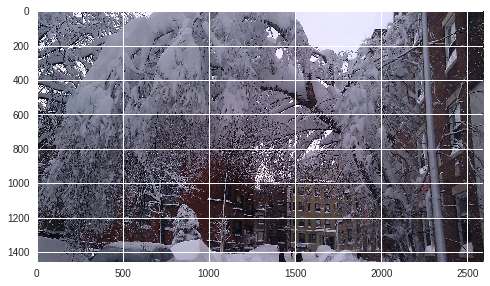

In [0]:
# plt.imshow(plt.imnemo100)
# !ls
print(plt.imread('nemo100.jp2').shape)
plt.imshow(plt.imread('nemo100.jp2'))

In [0]:
# https://www.howtogeek.com/109369/how-to-quickly-resize-convert-modify-images-from-the-linux-terminal/

In [0]:
!cp /usr/local/lib/python3.6/dist-packages/glymur/data/nemo.jp2 im_nemo.jp2
!convert -quality 100 im_nemo.jp2 nemo100.jpg #default is 92 quality on convert command, np.max == 255, min==0 --> R=8
!convert -quality 80 im_nemo.jp2 nemo80.jpg #default is 92 quality
!convert -quality 60 im_nemo.jp2 nemo60.jpg #default is 92 quality
!convert -quality 40 im_nemo.jp2 nemo40.jpg #default is 92 quality
!convert -quality 20 im_nemo.jp2 nemo20.jpg #default is 92 quality
!ls -lh | grep nemo

Let's define first an avgLength function for a non huffman object

In [0]:
def str_len(x):
  return len(str(x))
compute_len=np.vectorize(str_len)
def bpp(input_img):
  uniques = np.unique(input_img)
  freq_norm =  [(input_img==value).sum() / np.size(input_img) for value in uniques]
  lenCodes=compute_len(uniques).astype(float)
#   print(lenCodes,np.size(lenCodes),np.size(freq_norm))
  lenCodes*=freq_norm
  return np.sum(lenCodes)

dict_keys([20, 40, 60, 80, 100]) dict_values(['nemo20.jpg', 'nemo40.jpg', 'nemo60.jpg', 'nemo80.jpg', 'nemo100.jpg'])
nemo20.jpg (1456, 2592, 3)
nemo40.jpg (1456, 2592, 3)
nemo60.jpg (1456, 2592, 3)
nemo80.jpg (1456, 2592, 3)
nemo100.jpg (1456, 2592, 3)
quality results order shown below [100, 80, 60, 40, 20]
entropies [0.0, 15.921487431036041, 25.436615162743635, 32.06722431375209, 43.393677149753536]
psnr [100, 36.11096722534386, 34.076210413893875, 33.07018991129398, 31.756539073696665]
shannon [7.5752645448369025, 7.583205069547927, 7.575730389554403, 7.556165037064537, 7.534597622903865]
psnr_shannon [39.33682556913799, 39.33227560272506, 39.33655850576535, 39.34778925924137, 39.36020296628485]


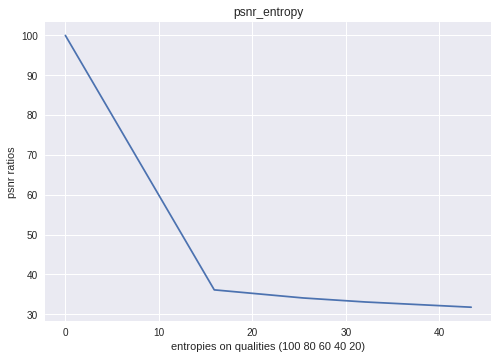

In [0]:
# nemo100=plt.imread('nemo100.jpg')#supposedly to be lossless
# plt.imshow(nemo100)
import re
def psnr_entropy(file_name,format):
  list_files_aux={}
  list_files={}
  #we take the current directory and applying regular expressions we scan all the files nemo*.jpg that contains numbers(i.e quality)
  for file in os.listdir():
    if(file.endswith(format) and file.startswith(file_name)):
      quality=int(re.findall(r'\d+',file)[0])
      list_files_aux[quality]=file
  #we sort the list of files from the filter above, so it goes in increasing order 20,40...
  for key in sorted(list_files_aux):
    list_files[key]=list_files_aux[key]
  shannon=[]
  entropies=[]
  psnr_shannon=[]
  psnr_entr=[]
  avgLengths=[]

  print(list_files.keys(),list_files.values())
  img100=plt.imread(list(list_files.values())[-1])#nemo100.jpg
  for index,file in enumerate(list_files.values()):
    image=plt.imread(file)
    avgLengths.append(bpp(image))
    print(file,image.shape)
    MSE_sh=shannonEntropy(image)
    shannon.append(MSE_sh)
    MSE = np.mean(np.power(np.subtract(img100,image),2))
    entropies.append(MSE)
    if(MSE_sh<0.001):
      psnr_shannon.append(100)
    else:
      psnr_shannon.append(10*np.log10((255**2)/MSE_sh))      
    if(MSE<0.001):
      psnr_entr.append(100)
    else:
      psnr_entr.append(10*np.log10((255**2)/MSE))
  plt.figure()
  plt.title('psnr_entropy')
  plt.xlabel('entropies on qualities ('+' '.join([str(key) for key in sorted(list_files_aux)[::-1]])+')')
  plt.ylabel('psnr ratios')
  plt.plot(entropies,psnr_entr)
  print('quality results order shown below',sorted(list_files_aux)[::-1])#matplotlib sorts the xarray and starts plotting x as 0 which is quality 100 so its reverted
  print('entropies',entropies[::-1])
  print('psnr',psnr_entr[::-1])
  print('shannon',shannon[::-1])
  print('psnr_shannon',psnr_shannon[::-1])
  return avgLengths[::-1]
#   plt.figure()
#   plt.title('psnr_entropy')
#   plt.xlabel('shannon entropies on qualities ('+' '.join([str(key) for key in sorted(list_files_aux)])+')')
#   plt.ylabel('psnr ratios')
#   plt.plot(shannon,psnr_shannon)
  
jpg_lengths=psnr_entropy('nemo','jpg')

The higher PSNR ratio the better..??

Our results show that the lower the quality we do the conversion from jp2 to jpeg the better PSNR ratio and entropy (higher and lower, respectively). But with so little difference. **LUCA, try with other pics perhaps** 

In [0]:
!convert -quality 100 im_nemo.jp2 nemo100.jp2 #default is 92 quality, np.max == 255, min==0 --> R=8
!convert -quality 80 im_nemo.jp2 nemo80.jp2 #default is 92 quality
!convert -quality 60 im_nemo.jp2 nemo60.jp2 #default is 92 quality
!convert -quality 40 im_nemo.jp2 nemo40.jp2 #default is 92 quality
!convert -quality 20 im_nemo.jp2 nemo20.jp2 #default is 92 quality
!ls -lh |grep 0.jp2

In [0]:
!ls -lh

total 27M
-rw-r--r--  1 root root    9.1K Oct 20 16:47 Compress_Lab4.txt
drwxrwxr-x 15   20 dialout 4.0K Oct 20 16:51 ImageMagick-7.0.8-12
-rw-r--r--  1 root root     13M Sep 23 12:15 ImageMagick.tar.gz
-rw-r--r--  1 root root    1.1M Oct 20 17:07 im_nemo.jp2
-rw-r--r--  1 root root    3.7K Oct 20 19:55 lab1.py
-rw-r--r--  1 root root     16K Oct 20 19:55 lab2.py
-rw-r--r--  1 root root     41K Oct 20 19:55 lab3.py
-rw-r--r--  1 root root    258K Oct 20 16:49 lena512.bmp
-rw-r--r--  1 root root    2.3M Oct 20 17:07 nemo100.jp2
-rw-r--r--  1 root root    4.0M Oct 20 17:07 nemo100.jpg
-rw-r--r--  1 root root    8.2K Oct 20 17:07 nemo20.jp2
-rw-r--r--  1 root root    260K Oct 20 17:07 nemo20.jpg
-rw-r--r--  1 root root    855K Oct 20 17:07 nemo40.jp2
-rw-r--r--  1 root root    403K Oct 20 17:07 nemo40.jpg
-rw-r--r--  1 root root    2.0M Oct 20 17:07 nemo60.jp2
-rw-r--r--  1 root root    531K Oct 20 17:07 nemo60.jpg
-rw-r--r--  1 root root    2.2M Oct 20 17:07 nemo80.jp2
-rw-r--r--  1 root

dict_keys([20, 40, 60, 80, 100]) dict_values(['nemo20.jp2', 'nemo40.jp2', 'nemo60.jp2', 'nemo80.jp2', 'nemo100.jp2'])
nemo20.jp2 (1456, 2592, 3)
nemo40.jp2 (1456, 2592, 3)
nemo60.jp2 (1456, 2592, 3)
nemo80.jp2 (1456, 2592, 3)
nemo100.jp2 (1456, 2592, 3)
quality results order shown below [100, 80, 60, 40, 20]
entropies [0.0, 0.001911435722199611, 0.26742947446072446, 6.814183381240673, 78.53111406822345]
psnr [100, 75.31720662731217, 53.8587108999048, 39.796665438771356, 29.18038602327469]
shannon [7.5639570527806175, 7.564249858905024, 7.576709246558625, 7.581842765149187, 7.4456523917940185]
psnr_shannon [39.3433130655865, 39.34314495037648, 39.33599739190342, 39.333055872317466, 39.41177604012347]


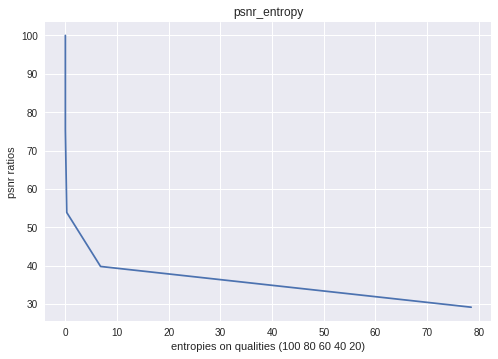

In [0]:
jp2_lengths=psnr_entropy('nemo','jp2')

In [0]:
# !identify -list format
def psnr_huffman(file_name,format):
  list_files_aux={}
  list_files={}
  #we take the current directory and applying regular expressions we scan all the files nemo*.jpg that contains numbers(i.e quality)
  for file in os.listdir():
    if(file.endswith(format) and file.startswith(file_name)):
      quality=int(re.findall(r'\d+',file)[0])
      list_files_aux[quality]=file
  #we sort the list of files from the filter above, so it goes in increasing order 20,40...
  for key in sorted(list_files_aux):
    list_files[key]=list_files_aux[key]
  shannon=[]
  entropies=[]
  psnr_shannon=[]
  psnr_entr=[]
  avgLengths=[]

  print(list_files.keys(),list_files.values())
  for index,file in enumerate(list_files.values()):
    image=plt.imread(file)
    huffman_img=huffmanCode(image)
    avgLengths.append(avgLength(huffman_img.codes))
  return avgLengths[::-1]
huff_lengths=psnr_huffman('nemo','jpg')
huff_lengths2=psnr_huffman('nemo','jp2')

dict_keys([20, 40, 60, 80, 100]) dict_values(['nemo20.jpg', 'nemo40.jpg', 'nemo60.jpg', 'nemo80.jpg', 'nemo100.jpg'])
dict_keys([20, 40, 60, 80, 100]) dict_values(['nemo20.jp2', 'nemo40.jp2', 'nemo60.jp2', 'nemo80.jp2', 'nemo100.jp2'])


In [0]:
print('jp2 avgLengths from 100 to 20',jp2_lengths)
print('jpg avgLengths from 100 to 20',jpg_lengths)
print('JPG huffman avgLengths from 100 to 20',huff_lengths)
print('JP2 huffman avgLengths from 100 to 20',huff_lengths2)

jp2 avgLengths from 100 to 20 [2.4801522824526296, 2.480166591060688, 2.4814936702957535, 2.481561592021661, 2.4565323035375117]
jpg avgLengths from 100 to 20 [2.4798170017354044, 2.4799885283826253, 2.480518476829241, 2.4798621356781076, 2.4778264270451773]
JPG huffman avgLengths from 100 to 20 [7.61054459622168, 7.617944972979695, 7.610082922799937, 7.5911648231526705, 7.569892427531316]
JP2 huffman avgLengths from 100 to 20 [7.601001107945553, 7.601281715648035, 7.6125265150872785, 7.616446013798444, 7.467726404575362]


array([ 20,  40,  60,  80, 100])

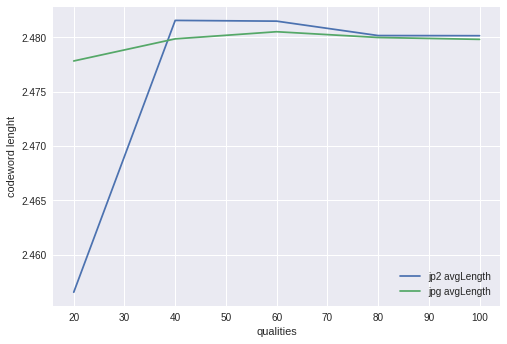

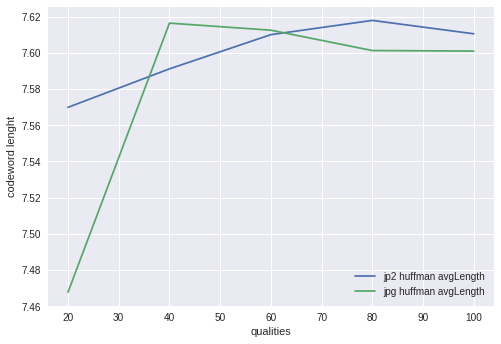

In [0]:
qualities=np.arange(20,101,20)
plt.figure()
plt.plot(qualities,jp2_lengths[::-1],label='jp2 avgLength')
plt.plot(qualities,jpg_lengths[::-1],label='jpg avgLength')
plt.legend(shadow=True, fancybox=True)
plt.xlabel('qualities')
plt.ylabel('codeword lenght')
plt.figure()

plt.plot(qualities,huff_lengths[::-1],label='jp2 huffman avgLength')
plt.plot(qualities,huff_lengths2[::-1],label='jpg huffman avgLength')
plt.xlabel('qualities')
plt.ylabel('codeword lenght')
plt.legend(shadow=True, fancybox=True)


This second plot is wrong.. actually what we had to do.. is applying haar transform to same Pic with different quality ratios.. then do the huffman coding over them and store them as pic/numpy object in memory.. then we get the number of Kbps of the image so we can compare its size against jp2 and jpeg

# **Export as latex project**

In [0]:
from google.colab import files
!apt install pandoc
!pip install pandoc
!git clone https://github.com/alvarogg777/colabCompression.git
!jupyter nbconvert colabCompression/Compress_Lab4.ipynb --to latex
!zip colabCompression/Compress_Lab4*
files.download('colabCompression/Compress_Lab4_files.zip')

[ 20  40  60  80 100]


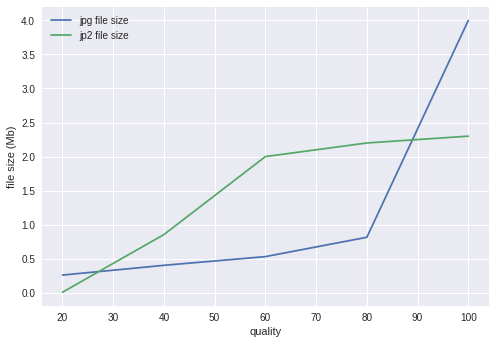

In [0]:
jpg_sizes=[4,0.815,0.531,0.403,0.260]
jp2_sizes=[2.3,2.2,2,0.855,0.0082]
files=np.arange(20,len(jpg_sizes)*21,20)
print(files)
plt.figure()
plt.xlabel('quality')
plt.ylabel('file size (Mb)')
plt.plot(files,jpg_sizes[::-1],label='jpg file size')
plt.plot(files,jp2_sizes[::-1],label='jp2 file size')
plt.legend(shadow=True, fancybox=True)
